In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sstore_df = pd.read_csv('../data/superstore-dataset-final/Sample-Superstore.csv', encoding='windows-1252')

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
sstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
sstore_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
sstore = sstore_df.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID', 'Product Name'])

In [7]:
sstore.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,6/12/2016,6/16/2016,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
sstore.loc[:, 'City'].drop_duplicates().count()

531

# Categorical Data

In [9]:
# 카테고리별 분류가 의미있는 것을 알아내기 위해 중복 제거한 요소의 개수를 구한다
# 예를 들어 ID의 경우 분류를 위해서는 의미가 거의 없기 때문이다.
have_few_category = []
print('Number of Categories of Column')
for col in sstore.columns:
    ct_num = sstore.loc[:, col].drop_duplicates().count()
    print(f'{col} : {ct_num}')
    if ct_num < 30 and ct_num != 1:
        have_few_category.append(col)

Number of Categories of Column
Order Date : 1237
Ship Date : 1334
Ship Mode : 4
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Category : 3
Sub-Category : 17
Sales : 5825
Quantity : 14
Discount : 12
Profit : 7287


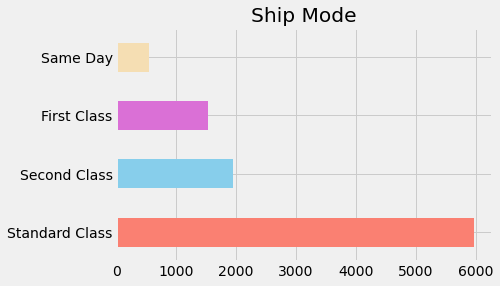

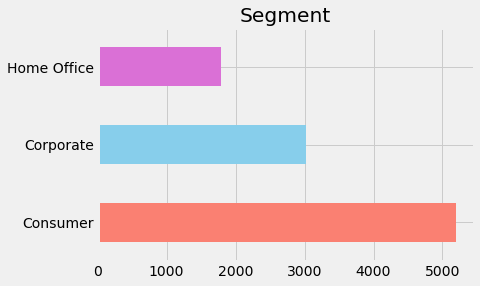

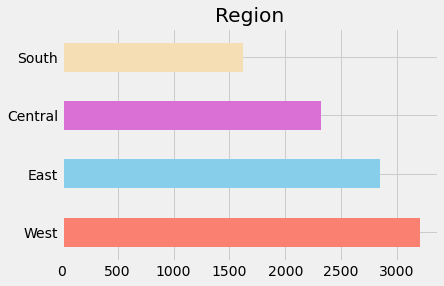

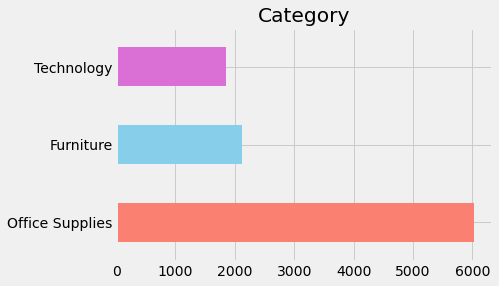

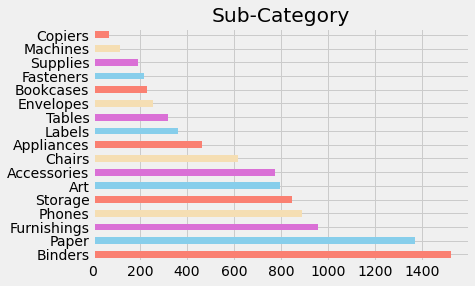

In [10]:
ax_cnt = 0
have_few_category.remove('Quantity')
have_few_category.remove('Discount')
for col in have_few_category:
    sstore.loc[:, col].value_counts().plot(kind='barh', title=col, color=['salmon', 'skyblue', 'orchid', 'wheat'])
    plt.show()

# Numerical Data

In [11]:
sstore.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [12]:
sstore.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,11/8/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,6/12/2016,6/16/2016,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
sstore_num = sstore[['Ship Mode', 'Sales', 'Quantity', 'Discount', 'Profit']]

In [14]:
sstore_num_shipmode_change = sstore_num.replace({'Same Day': 0, 'First Class': 1, 'Second Class': 2, 'Standard Class': 3})

In [15]:
sstore_num_shipmode_change.corr()

,Ship Mode,Sales,Quantity,Discount,Profit
Ship Mode,1.000000,-0.003224,0.024864,0.007337,-0.005767
Sales,-0.003224,1.000000,0.200795,-0.028190,0.479064
Quantity,0.024864,0.200795,1.000000,0.008623,0.066253
Discount,0.007337,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.005767,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

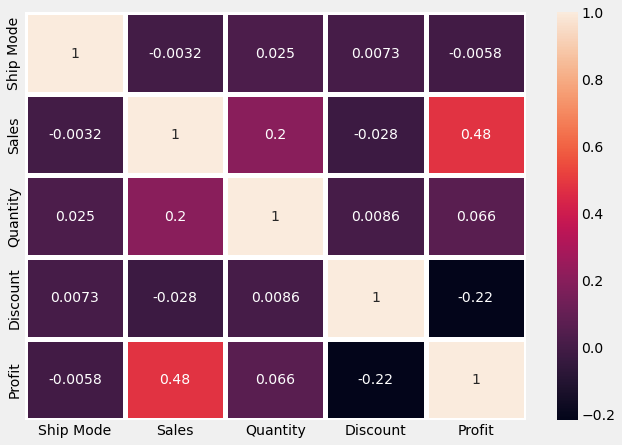

In [16]:
plt.figure(figsize=(10, 7))
sns.heatmap(sstore_num_shipmode_change.corr(), annot=True, linewidth=5, linecolor='white')

**`Profit`** have positive correlation with **`Sales`** 48%.

**`Ship Mode`** doesn't have correlation with any Columns.

In [17]:
sstore_sales_profit = sstore_num_shipmode_change[['Sales', 'Profit']].set_index(pd.to_datetime(sstore['Order Date'], format='%m/%d/%Y')).sort_index()

In [18]:
sstore_sales_profit = sstore_sales_profit.groupby('Order Date').mean()

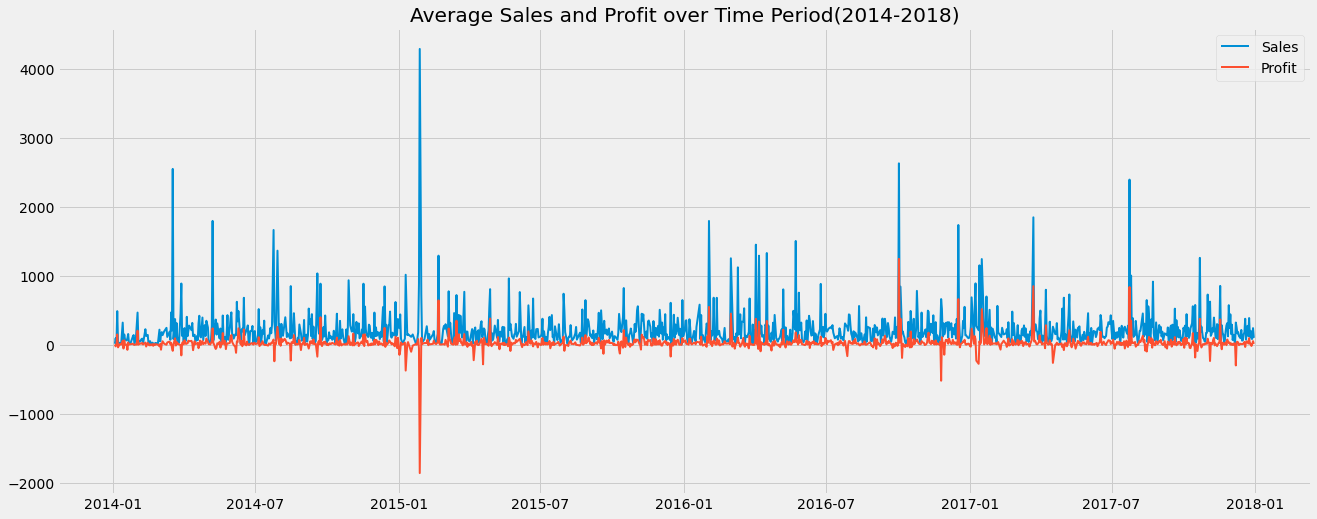

In [19]:
plt.figure(figsize=(20, 8))
plt.plot(sstore_sales_profit.index, 'Sales', data=sstore_sales_profit, linewidth=2)
plt.plot(sstore_sales_profit.index, 'Profit', data=sstore_sales_profit, linewidth=2)
plt.title("Average Sales and Profit over Time Period(2014-2018)")
plt.legend()


In [20]:
sstore_nnum = sstore_num.drop(['Ship Mode', 'Quantity'], axis=1)

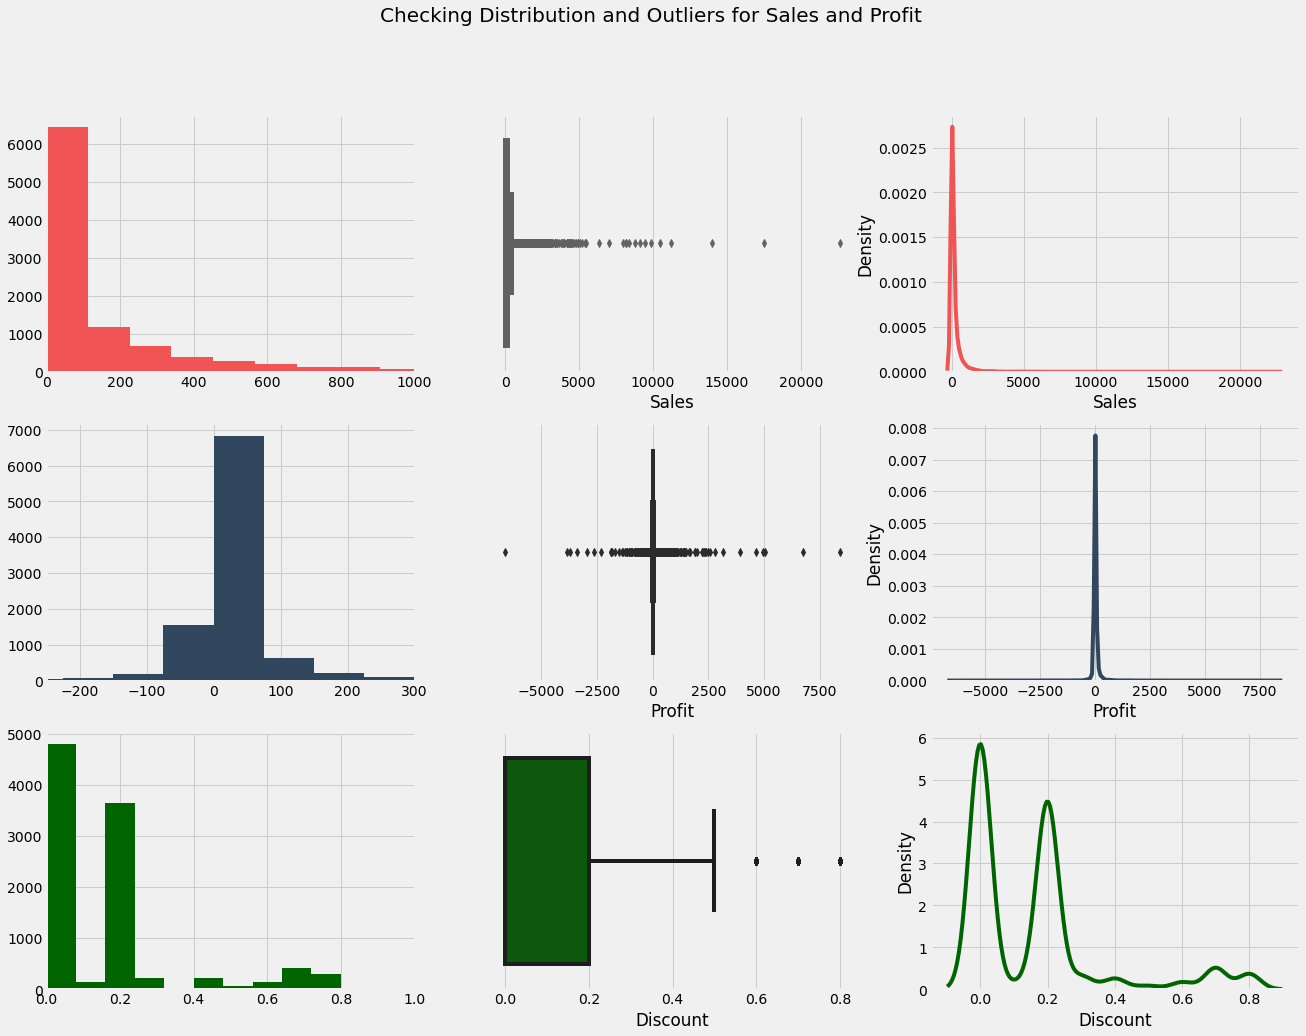

In [21]:
# Visualizing the histograms
plt.figure(figsize=[20,15])

plt.suptitle("Checking Distribution and Outliers for Sales and Profit", size=20)

# Histogram for Sales
plt.subplot(3,3,1)
plt.hist(sstore_nnum['Sales'], bins=200, color='#F05454')
plt.xlim(0,1000)

# Boxplot of  for Sales
plt.subplot(3,3,2)
sns.boxplot(sstore_nnum['Sales'], color='#F05454')

# KDEPlot for Sales
plt.subplot(3,3,3)
sns.kdeplot(x=sstore_nnum['Sales'], color='#F05454')

################################################################
# Histogram for Profit
plt.subplot(3,3,4)
plt.hist(sstore_nnum['Profit'], bins=200, color='#30475E')
plt.xlim(-250,300)

# Boxplot of  for Profit
plt.subplot(3,3,5)
sns.boxplot(sstore_nnum['Profit'], color='#30475E')

# KDEPlot for Profit
plt.subplot(3,3,6)
sns.kdeplot(x=sstore_nnum['Profit'], color='#30475E')

#################################################################
# Histogram for Discount
plt.subplot(3,3,7)
plt.hist(sstore_nnum['Discount'], bins=10, color='#006400')
plt.xlim(0,1)

# Boxplot of  for Discount
plt.subplot(3,3,8)
sns.boxplot(sstore_nnum['Discount'], color='#006400')

# KDEPlot for Discount
plt.subplot(3,3,9)
sns.kdeplot(x=sstore_nnum['Discount'], color='#006400')


plt.show()

# Categorical Data X Profit

In [22]:
sstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [23]:
sstore_bc = sstore.loc[:, ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category', 'State', 'Profit']]

## sum and average of profiles by category

In [24]:
sstore_bc

,Ship Mode,Segment,Region,Category,Sub-Category,State,Profit
0,Second Class,Consumer,South,Furniture,Bookcases,Kentucky,41.9136
1,Second Class,Consumer,South,Furniture,Chairs,Kentucky,219.5820
2,Second Class,Corporate,West,Office Supplies,Labels,California,6.8714
3,Standard Class,Consumer,South,Furniture,Tables,Florida,-383.0310
4,Standard Class,Consumer,South,Office Supplies,Storage,Florida,2.5164
...,...,...,...,...,...,...,...
9989,Second Class,Consumer,South,Furniture,Furnishings,Florida,4.1028
9990,Standard Class,Consumer,West,Furniture,Furnishings,California,15.6332
9991,Standard Class,Consumer,West,Technology,Phones,California,19.3932
9992,Standard Class,Consumer,West,Office Supplies,Paper,California,13.3200


In [26]:
temp_df = sstore[['Ship Mode', 'Profit']].groupby('Ship Mode').mean()

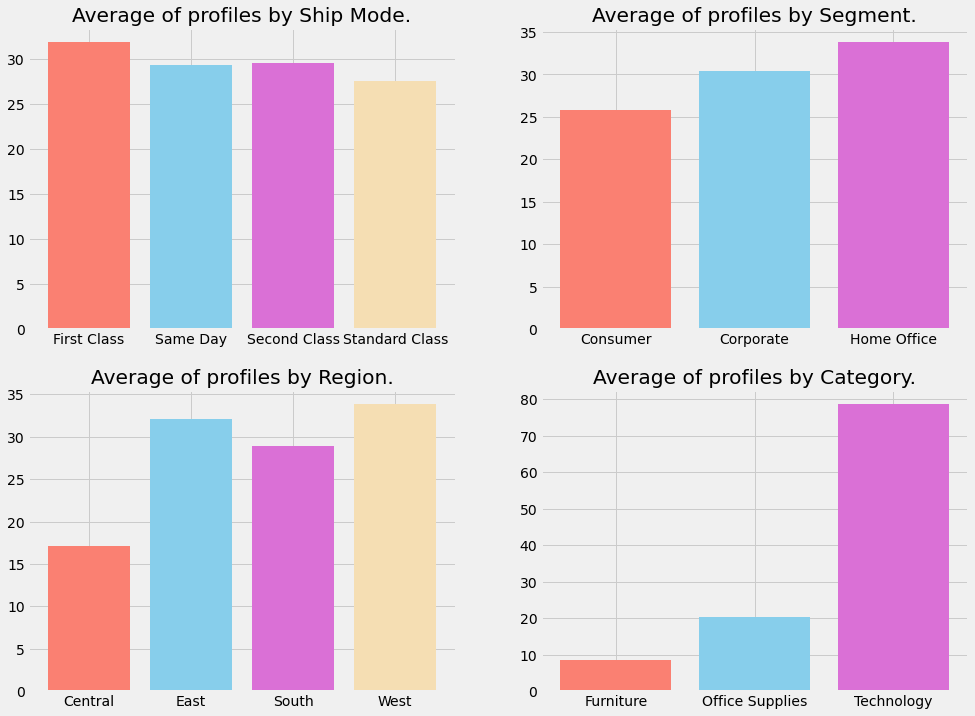

In [27]:
plt.figure(figsize=(15,30))
cnt = 1
plt.title('Average of profiles by category.')
for col in ['Ship Mode', 'Segment', 'Region', 'Category']:
    plt.subplot(5,2,cnt)
    plt.title('Average of profiles by ' + col + '.')
    sstore_cat_mean = sstore[[col, 'Profit']].groupby(col).mean()
    plt.bar(sstore_cat_mean.index, sstore_cat_mean['Profit'], color=['salmon', 'skyblue', 'orchid', 'wheat'])
    cnt += 1



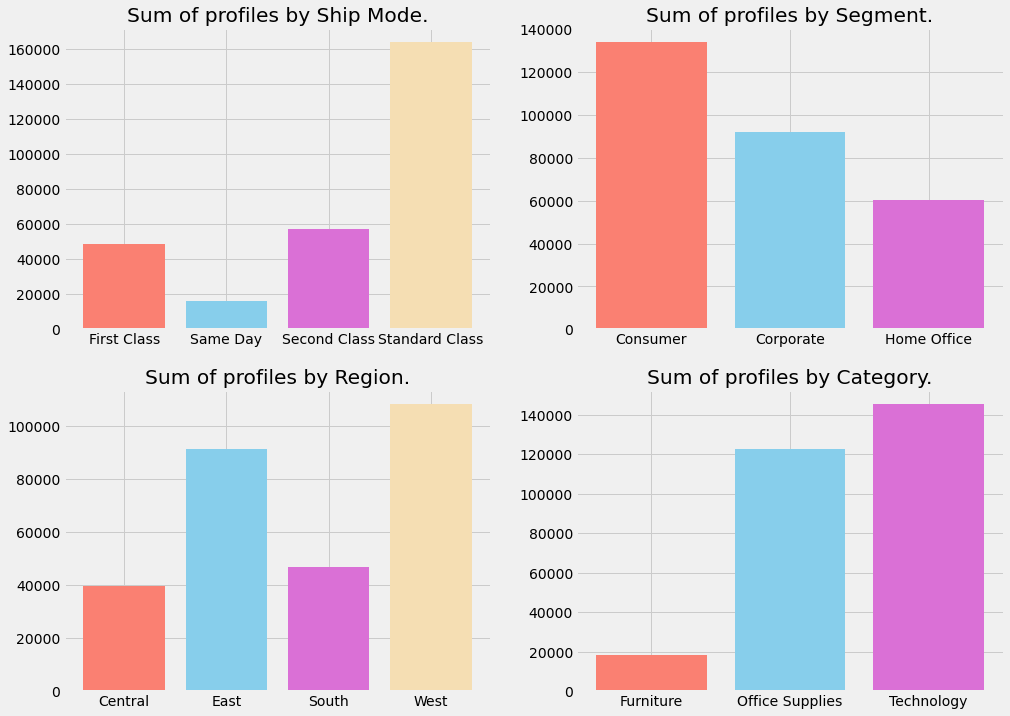

In [28]:
plt.figure(figsize=(15,30))
cnt = 1

for col in ['Ship Mode', 'Segment', 'Region', 'Category']:
    plt.subplot(5,2,cnt)
    plt.title('Sum of profiles by ' + col + '.')
    sstore_cat_sum = sstore[[col, 'Profit']].groupby(col).sum()
    plt.bar(sstore_cat_sum.index, sstore_cat_sum['Profit'], color=['salmon', 'skyblue', 'orchid', 'wheat'])
    cnt += 1
